
# Prediction using Supervised ML - Python

This is a simple linear regression task as it involves just two variables- one is percentage of score and another one is the number of study hours per day. Where,

- We have to predict the percentage of the score of a student based on the 9.25 hours per day of studies. 

Author : Moumita Das

In [1]:
#import Important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset for further process

data = "http://bit.ly/w-data"

df = pd.read_csv(data)

df


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Performing basic functions 

In [3]:
# Exploring the dataset
df.shape

(25, 2)

In [4]:
# print the rows (if dont pass the parameter then by default first five rows will fetch)

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
# print the rows (if dont pass the parameter then by default last five rows will fetch)

df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
#check the datatype of dataset and also can check total null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [7]:
#check the basic functions like count, mean ,min, max, std var, quartile

df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualisation

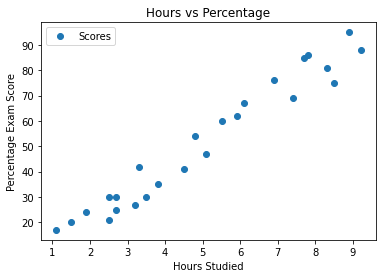

In [8]:
# Data visualisation by plotting the distribution of scores

df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Exam Score')  
plt.show()

We can clearly see that there is a positive linear relation between the number of hours studied and percentage of score from the above data.


# Preparing the data

In [9]:
#Dividing the data into "attributes" (inputs) and "labels" (outputs)

X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values 


In [10]:
#preparing data & splitting it into two sets Train and Test

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0) 

# Training the Algorithm

In [11]:
#Train our algorithm

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training Complete...")

Training Complete...


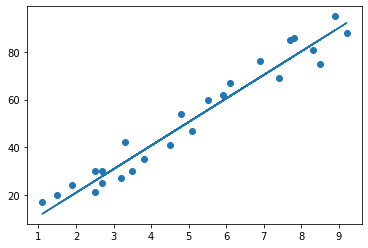

In [12]:
# Plotting the regression line

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data

plt.scatter(X, y)
plt.plot(X, line)
plt.show()

Our algorithm is trained successfully. Now its time to predict the data.

# Making Predictions

In [13]:
# Testing data - In Hours
print(X_test) 

# Predicting the scores
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]]


# Comparing the data between actual and predicted

In [14]:
# Comparing Actual vs Predicted

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,15.947762
1,27,32.773947
2,69,74.344523
3,30,25.845518
4,62,59.497889
5,35,38.712601
6,24,19.906864
7,86,78.303625
8,76,69.395645
9,17,11.988659


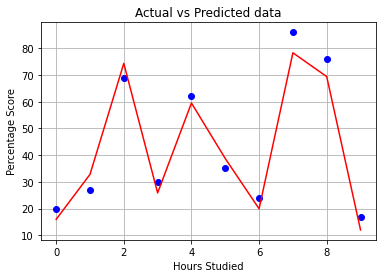

In [15]:
plt.plot(df['Actual'],'bo')
plt.plot(df['Predicted'],'r')
plt.title('Actual vs Predicted data') 
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.grid()
plt.show()

In [16]:
# Estimating trained and test score

print("Trained Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Trained Score: 0.9440108159733135
Test Score: 0.956640847232559


# Now see that what will be predicted score if a student studies for 9.25 hrs/ day?

In [17]:
hours = 9.25

predperc = regressor.predict([[hours]])

print("If a student studied for {} hourse per day".format(hours))
print("\nThen he/she is likely to score of {}%".format(predperc[0]))

If a student studied for 9.25 hourse per day

Then he/she is likely to score of 92.65537184734605%


# Evaluating the model

This is the final step to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean squared error, mean absolute error,root mean squared error.

In [18]:
# Evaluating the performance of our algorithm

from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('\nMean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.894510863410611

Mean Squared Error: 26.03456968768225

Root Mean Squared Error: 5.102408224327239


In [19]:
# checking the accuracy  of model

from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.956640847232559

# Result:
 - After Analysing the Dataset we got the predicted score around 92% based on the no. of  9.25 hours per day of studies.
